## 1주차 (10/31): 프로젝트 주제 선정 및 데이터셋 선택
### 프로젝트 주제: 보스턴 주택 가격 예측
이 프로젝트는 보스턴 주택 가격을 예측하는 회귀 모델을 개발하는 것을 목표로 합니다.

### 데이터셋 설명
- **출처**: 보스턴 주택 가격 데이터
- **타겟 변수**: `medv` (주택 가격)
- **특성**: 범죄율, 방 개수, 찰스강 근처 여부, 세율 등 다양한 지표

## 2주차 (11/7): 데이터셋 탐색 및 전처리
데이터를 불러오고, 기본적인 탐색적 데이터 분석(EDA)을 수행하며, 필요한 전처리를 진행합니다.

## 3주차 (11/14): 모델 선택 및 초기 설계
회귀 문제에 적합한 모델을 선택하고 초기 설계를 진행합니다.

## 4주차 (11/21): 특성 엔지니어링 및 모델 튜닝
특성 엔지니어링과 하이퍼파라미터 튜닝을 통해 모델 성능을 개선합니다.

## 5주차 (11/28): 최종 튜닝 및 모델 결정
최종 하이퍼파라미터 튜닝을 수행하고 최적 모델을 결정합니다.

## 6주차 (12/5): 프로젝트 보고서 준비 및 발표 자료 제작
모델 성능 지표와 시각화를 포함한 보고서를 준비하고 발표 자료를 제작합니다.

## 7주차 (12/12): 프로젝트 보고서 제출 및 발표
최종 보고서를 제출하고 프로젝트 결과를 발표합니다.

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print("Train Datas Shape : {}".format(train_data.shape))
print("Train Labels Shape : {}".format(train_targets.shape))

Train Datas Shape : (404, 13)
Train Labels Shape : (404,)


In [3]:
display(train_data[0])
display(train_targets[0:10])

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [4]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std


In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_network(input_shape=(0,)):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [6]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 150
all_scores = []
all_history = []
for i in range(k):
    print('폴드 번호 #{}'.format(i))
    fold_start_index = i * num_val_samples
    fold_end_index = (i + 1) * num_val_samples

    val_data = train_data[fold_start_index : fold_end_index]
    val_targets = train_targets[fold_start_index : fold_end_index]

    partial_train_data = np.concatenate(
        [train_data[:fold_start_index], train_data[fold_end_index:]],
        axis=0
    )

    partial_train_targets = np.concatenate(
        [train_targets[:fold_start_index], train_targets[fold_end_index:]],
        axis=0
    )

    model = build_network((partial_train_data.shape[1], ))
    history = model.fit(
        partial_train_data,
        partial_train_targets,
        epochs=num_epochs,
        validation_data=(val_data, val_targets),
        batch_size=1,
        verbose=0
    )
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mse)
    all_history.append(history.history)

폴드 번호 #0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


폴드 번호 #1
폴드 번호 #2
폴드 번호 #3


In [39]:
val_mae_lst = [hist['val_mae'] for hist in all_history]
val_mae_lst = np.array(list(val_mae_lst))
avg_mae = [
    np.mean([x[i] for x in val_mae_lst]) for i in range(num_epochs)
]

In [40]:
val_mae_lst = [hist['val_loss'] for hist in all_history]
val_mae_lst = np.array(list(val_mae_lst))
avg_mae = [
    np.mean([x[i] for x in val_mae_lst]) for i in range(num_epochs)
]

In [11]:
import matplotlib.pyplot as plt
def smooth_curve(points, factor=.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [12]:
def show_graph(data):
    smooth_data = smooth_curve(data)
    plt.plot(range(1, len(smooth_data) + 1), smooth_data)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()

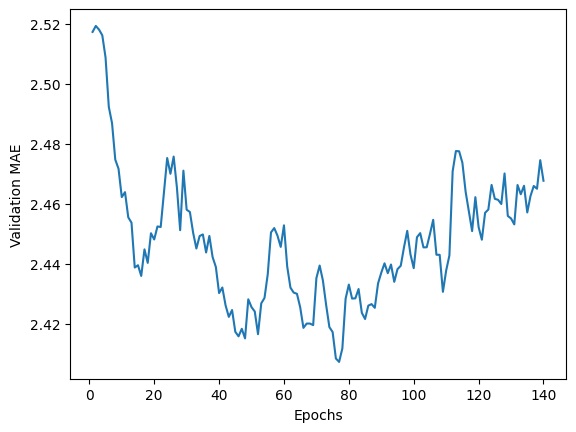

In [37]:
show_graph(avg_mae[10:])

키 설정


In [21]:
# all_history 내 각 요소의 키를 확인
for i, hist in enumerate(all_history):
    print(f"Fold {i} history keys:", hist.keys())


Fold 0 history keys: dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
Fold 1 history keys: dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
Fold 2 history keys: dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
Fold 3 history keys: dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [22]:
for i, hist in enumerate(all_history):
    print(f"Fold {i} keys: {list(hist.keys())}")


Fold 0 keys: ['loss', 'mae', 'val_loss', 'val_mae']
Fold 1 keys: ['loss', 'mae', 'val_loss', 'val_mae']
Fold 2 keys: ['loss', 'mae', 'val_loss', 'val_mae']
Fold 3 keys: ['loss', 'mae', 'val_loss', 'val_mae']


In [23]:
val_mae_lst = [
    hist['val_mae'] for hist in all_history if 'val_mae' in hist
]


In [24]:
for i, hist in enumerate(all_history):
    print(f"Fold {i} history:", hist)


Fold 0 history: {'loss': [219.17979431152344, 26.248050689697266, 19.601879119873047, 15.834965705871582, 14.40241813659668, 13.031210899353027, 13.013917922973633, 12.13065242767334, 11.264562606811523, 10.94727897644043, 10.768606185913086, 9.996673583984375, 10.24542236328125, 9.70141315460205, 9.284697532653809, 8.827516555786133, 8.63235855102539, 8.663344383239746, 8.189258575439453, 8.157590866088867, 7.660116195678711, 7.965345859527588, 7.372934818267822, 7.249536037445068, 7.230571269989014, 6.722349643707275, 7.423863410949707, 7.280123710632324, 6.473167419433594, 6.474806785583496, 6.066049575805664, 6.772369861602783, 6.3964762687683105, 5.989958763122559, 6.042914867401123, 5.0705060958862305, 5.910528659820557, 5.692984104156494, 5.182265281677246, 5.824638366699219, 5.385228633880615, 5.109734535217285, 5.161222457885742, 4.8485188484191895, 4.813932418823242, 4.669284820556641, 4.431445598602295, 4.731428623199463, 4.353144645690918, 4.614144325256348, 4.3175010681152

In [26]:
# 각 폴드의 history에서 키 확인
for i, hist in enumerate(all_history):
    print(f"Fold {i} history keys: {list(hist.keys())}")


Fold 0 history keys: ['loss', 'mae', 'val_loss', 'val_mae']
Fold 1 history keys: ['loss', 'mae', 'val_loss', 'val_mae']
Fold 2 history keys: ['loss', 'mae', 'val_loss', 'val_mae']
Fold 3 history keys: ['loss', 'mae', 'val_loss', 'val_mae']


In [27]:
# val_mae_lst 추출
val_mae_lst = [
    hist['val_mae'] for hist in all_history if 'val_mae' in hist
]

# numpy 배열로 변환
val_mae_lst = np.array(val_mae_lst)

# 에포크별 평균 MAE 계산
avg_mae = [
    np.mean(val_mae_lst[:, i]) for i in range(val_mae_lst.shape[1])
]

print("에포크별 평균 MAE:", avg_mae)


에포크별 평균 MAE: [4.0135802030563354, 3.100005567073822, 2.9052188992500305, 2.6423060297966003, 2.566911280155182, 2.6696296334266663, 2.5921342372894287, 2.569424092769623, 2.6253899931907654, 2.512034237384796, 2.5173664689064026, 2.5373750925064087, 2.506941556930542, 2.4990352392196655, 2.4424787163734436, 2.3443562388420105, 2.43776136636734, 2.365273892879486, 2.4444849491119385, 2.3771792352199554, 2.4787421822547913, 2.3800160586833954, 2.437565565109253, 2.3042831420898438, 2.4463759660720825, 2.4039090871810913, 2.524648368358612, 2.3996835947036743, 2.5392311215400696, 2.4294925332069397, 2.4915229082107544, 2.450598359107971, 2.5683019161224365, 2.5779415369033813, 2.422812819480896, 2.5273962020874023, 2.3726751804351807, 2.323117256164551, 2.649788558483124, 2.3408427834510803, 2.4505210518836975, 2.388021767139435, 2.3977981209754944, 2.48685085773468, 2.454626500606537, 2.3895050287246704, 2.499098300933838, 2.3788756132125854, 2.4093350768089294, 2.351828873157501, 2.4488

In [28]:
for i, hist in enumerate(all_history):
    print(f"Fold {i} history data:", hist)


Fold 0 history data: {'loss': [219.17979431152344, 26.248050689697266, 19.601879119873047, 15.834965705871582, 14.40241813659668, 13.031210899353027, 13.013917922973633, 12.13065242767334, 11.264562606811523, 10.94727897644043, 10.768606185913086, 9.996673583984375, 10.24542236328125, 9.70141315460205, 9.284697532653809, 8.827516555786133, 8.63235855102539, 8.663344383239746, 8.189258575439453, 8.157590866088867, 7.660116195678711, 7.965345859527588, 7.372934818267822, 7.249536037445068, 7.230571269989014, 6.722349643707275, 7.423863410949707, 7.280123710632324, 6.473167419433594, 6.474806785583496, 6.066049575805664, 6.772369861602783, 6.3964762687683105, 5.989958763122559, 6.042914867401123, 5.0705060958862305, 5.910528659820557, 5.692984104156494, 5.182265281677246, 5.824638366699219, 5.385228633880615, 5.109734535217285, 5.161222457885742, 4.8485188484191895, 4.813932418823242, 4.669284820556641, 4.431445598602295, 4.731428623199463, 4.353144645690918, 4.614144325256348, 4.31750106

In [29]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mean_absolute_error']  # 또는 ['mae']
)


In [31]:
# 모든 폴드의 history 데이터 확인
for i, hist in enumerate(all_history):
    print(f"Fold {i} history:")
    for key, value in hist.items():
        print(f"  {key}: {value[:5]}...")  # 처음 5개의 값만 출력


Fold 0 history:
  loss: [219.17979431152344, 26.248050689697266, 19.601879119873047, 15.834965705871582, 14.40241813659668]...
  mae: [10.946484565734863, 3.4810774326324463, 3.061713457107544, 2.762134552001953, 2.731403350830078]...
  val_loss: [33.483360290527344, 20.605026245117188, 15.263555526733398, 12.302225112915039, 10.801761627197266]...
  val_mae: [3.673821210861206, 2.9682717323303223, 2.5898232460021973, 2.253821611404419, 2.24847674369812]...
Fold 1 history:
  loss: [189.62254333496094, 24.21395492553711, 16.55881690979004, 14.127354621887207, 12.400456428527832]...
  mae: [9.989703178405762, 3.3520376682281494, 2.737988233566284, 2.5080156326293945, 2.4041991233825684]...
  val_loss: [26.550203323364258, 17.749794006347656, 18.116125106811523, 13.838176727294922, 12.884018898010254]...
  val_mae: [3.9250543117523193, 3.1056294441223145, 3.3321614265441895, 2.8004298210144043, 2.7314181327819824]...
Fold 2 history:
  loss: [208.77406311035156, 26.630983352661133, 16.8514

In [32]:
val_mae_lst = [
    hist['val_mae'] for hist in all_history if 'val_mae' in hist
]


In [33]:
val_mae_lst = []
for hist in all_history:
    if 'val_mean_absolute_error' in hist:
        val_mae_lst.append(hist['val_mean_absolute_error'])
    elif 'val_mae' in hist:  # 다른 대체 키 확인
        val_mae_lst.append(hist['val_mae'])
    else:
        print("경고: 이 history에 'val_mean_absolute_error' 또는 'val_mae'가 없습니다.", hist.keys())


In [34]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mean_absolute_error']  # 또는 'mae'
)


In [35]:
# 모든 history 데이터에서 문제가 있는 항목 확인
for i, hist in enumerate(all_history):
    if not isinstance(hist, dict):
        print(f"Fold {i} 데이터가 잘못되었습니다: {hist}")
    elif 'val_mean_absolute_error' not in hist:
        print(f"Fold {i}에서 'val_mean_absolute_error' 키가 없습니다. 키들: {list(hist.keys())}")


Fold 0에서 'val_mean_absolute_error' 키가 없습니다. 키들: ['loss', 'mae', 'val_loss', 'val_mae']
Fold 1에서 'val_mean_absolute_error' 키가 없습니다. 키들: ['loss', 'mae', 'val_loss', 'val_mae']
Fold 2에서 'val_mean_absolute_error' 키가 없습니다. 키들: ['loss', 'mae', 'val_loss', 'val_mae']
Fold 3에서 'val_mean_absolute_error' 키가 없습니다. 키들: ['loss', 'mae', 'val_loss', 'val_mae']


In [36]:
# val_mae_lst를 numpy 배열로 변환
val_mae_lst = np.array(val_mae_lst)

# 에포크별 평균 MAE 계산
avg_mae = [
    np.mean(val_mae_lst[:, i]) for i in range(val_mae_lst.shape[1])
]

print("에포크별 평균 MAE:", avg_mae)


에포크별 평균 MAE: [4.0135802030563354, 3.100005567073822, 2.9052188992500305, 2.6423060297966003, 2.566911280155182, 2.6696296334266663, 2.5921342372894287, 2.569424092769623, 2.6253899931907654, 2.512034237384796, 2.5173664689064026, 2.5373750925064087, 2.506941556930542, 2.4990352392196655, 2.4424787163734436, 2.3443562388420105, 2.43776136636734, 2.365273892879486, 2.4444849491119385, 2.3771792352199554, 2.4787421822547913, 2.3800160586833954, 2.437565565109253, 2.3042831420898438, 2.4463759660720825, 2.4039090871810913, 2.524648368358612, 2.3996835947036743, 2.5392311215400696, 2.4294925332069397, 2.4915229082107544, 2.450598359107971, 2.5683019161224365, 2.5779415369033813, 2.422812819480896, 2.5273962020874023, 2.3726751804351807, 2.323117256164551, 2.649788558483124, 2.3408427834510803, 2.4505210518836975, 2.388021767139435, 2.3977981209754944, 2.48685085773468, 2.454626500606537, 2.3895050287246704, 2.499098300933838, 2.3788756132125854, 2.4093350768089294, 2.351828873157501, 2.4488

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [3]:
# 코랩의 경우 나눔 폰트를 설치합니다.
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# 나눔 폰트를 사용합니다.
import matplotlib

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [4]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [5]:
from google.colab import files
uploaded = files.upload()  # 데이터 파일 업로드


Saving BostonHousingprice.csv to BostonHousingprice.csv


In [6]:
import pandas as pd

df = pd.read_csv("BostonHousingprice.csv")
X = df.iloc[:, :-1].values  # 입력 특성
y = df.iloc[:, -1].values  # 출력 값


In [10]:
import keras_tuner as kt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 데이터 로드
df = pd.read_csv("BostonHousingprice.csv")
X = df.iloc[:, :-1].values  # 입력 특성
y = df.iloc[:, -1].values  # 출력 값

# 데이터 분리
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = np.nan_to_num(scaler.fit_transform(X_train))
X_valid_scaled = np.nan_to_num(scaler.transform(X_valid))
X_test_scaled = np.nan_to_num(scaler.transform(X_test))
y_train = np.nan_to_num(y_train)
y_valid = np.nan_to_num(y_valid)
y_test = np.nan_to_num(y_test)

# 사용자 정의 HuberLoss 함수
class HuberLoss(tf.keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)

    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

# 모델 구조 정의
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256, step=16)
    learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-3, sampling="log")
    optimizer = hp.Choice("optimizer", values=["adam", "sgd"])

    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(X_train_scaled.shape[1],)))
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu", kernel_initializer="he_normal"))
    model.add(tf.keras.layers.Dense(1))

    loss = HuberLoss(threshold=hp.Float("threshold", min_value=0.5, max_value=5.0, step=0.5))
    model.compile(loss=loss, optimizer=optimizer, metrics=["mae"])
    return model

# 이 문단부터 하이퍼 파라미터
# Keras Tuner 설정
tuner = kt.Hyperband(
    build_model,
    objective="val_mae",
    max_epochs=20,
    factor=3,
    directory="tuner_dir",
    project_name="huber_loss_tuning",
    max_consecutive_failed_trials=10
)

# 하이퍼파라미터 검색 실행
tuner.search(
    X_train_scaled, y_train,
    validation_data=(X_valid_scaled, y_valid),
    verbose=2
)

# 최적의 하이퍼파라미터로 모델 재설정 및 훈련
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = build_model(best_hps)
history = model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid), epochs=20)

# 모델 평가
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)

# 모델 저장
model.save("final_model.keras")

# 최종 평가 결과 출력
print(f"Test loss: {test_loss}")
print(f"Test MAE: {test_mae}")


Trial 25 Complete [00h 00m 12s]
val_mae: 6.333751678466797

Best val_mae So Far: 5.846325874328613
Total elapsed time: 00h 20m 31s
Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 29.7646 - mae: 9.9335 - val_loss: 21.2158 - val_mae: 7.5686
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 20.2962 - mae: 7.2785 - val_loss: 18.6659 - val_mae: 6.5232
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 19.6290 - mae: 6.9179 - val_loss: 18.4463 - val_mae: 6.5994
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 19.5823 - mae: 7.0211 - val_loss: 17.9505 - val_mae: 6.1841
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.2577 - mae: 6.9212 - val_loss: 18.6357 - val_mae: 6.9320
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 19.3167 - mae: 6.9291 - val_loss: 21.2717 - val_mae: 6.7157
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 20.6269 - mae: 6.9789 - val_loss: 17.7424 - val_mae: 6.2901
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1

In [11]:

# 저장된 모델 다운로드
files.download("final_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
results = {"Metric": ["Test Loss", "Test MAE"], "Value": [test_loss, test_mae]}
df = pd.DataFrame(results)
df.to_csv("results.csv", index=False)

# CSV 다운로드
files.download("results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/BostonHousing2.csv")




In [5]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
# 그래프 배경 설정
sns.set_style('darkgrid')

In [7]:
# shape (dimension)
df.shape

(506, 17)

In [8]:
# 결측치
df.isnull().sum()

,0
TOWN,0
LON,0
LAT,0
CMEDV,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0


In [9]:
# data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   CMEDV    506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


In [10]:
# numerical variable
df.describe()

,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,-71.056389,42.216440,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,0.075405,0.061777,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,-71.289500,42.030000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,-71.093225,42.180775,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,-71.052900,42.218100,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,-71.019625,42.252250,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,-70.810000,42.381000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
# categorical variable
num_town = df['TOWN'].unique()
print(len(num_town))
num_town


92


array(['Nahant', 'Swampscott', 'Marblehead', 'Salem', 'Lynn', 'Sargus',
       'Lynnfield', 'Peabody', 'Danvers', 'Middleton', 'Topsfield',
       'Hamilton', 'Wenham', 'Beverly', 'Manchester', 'North Reading',
       'Wilmington', 'Burlington', 'Woburn', 'Reading', 'Wakefield',
       'Melrose', 'Stoneham', 'Winchester', 'Medford', 'Malden',
       'Everett', 'Somerville', 'Cambridge', 'Arlington', 'Belmont',
       'Lexington', 'Bedford', 'Lincoln', 'Concord', 'Sudbury', 'Wayland',
       'Weston', 'Waltham', 'Watertown', 'Newton', 'Natick', 'Framingham',
       'Ashland', 'Sherborn', 'Brookline', 'Dedham', 'Needham',
       'Wellesley', 'Dover', 'Medfield', 'Millis', 'Norfolk', 'Walpole',
       'Westwood', 'Norwood', 'Sharon', 'Canton', 'Milton', 'Quincy',
       'Braintree', 'Randolph', 'Holbrook', 'Weymouth', 'Cohasset',
       'Hull', 'Hingham', 'Rockland', 'Hanover', 'Norwell', 'Scituate',
       'Marshfield', 'Duxbury', 'Pembroke', 'Boston Allston-Brighton',
       'Boston Bac

In [13]:
# 기초 통계량
df['CMEDV'].describe()

,CMEDV
count,506.000000
mean,22.528854
std,9.182176
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


<Axes: >

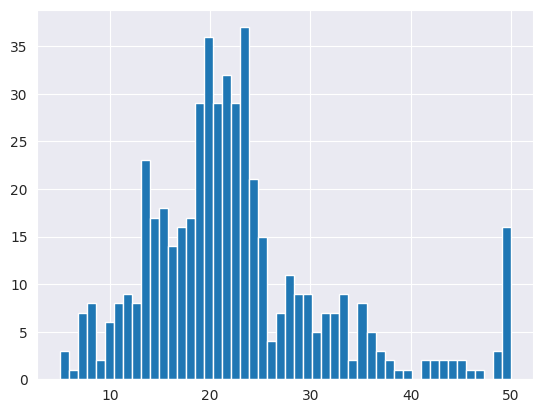

In [14]:
# 분포
df['CMEDV'].hist(bins=50)

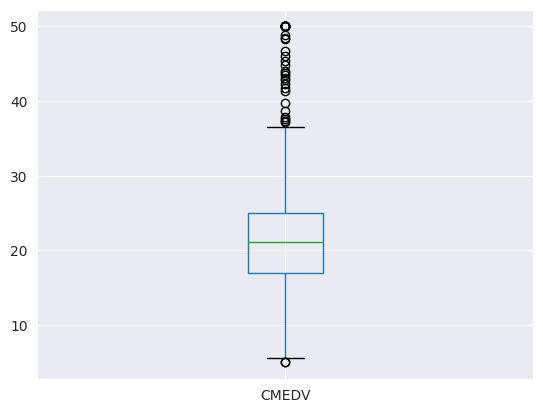

In [16]:
# boxplot - Pandas
df.boxplot(column=['CMEDV'])
plt.show()

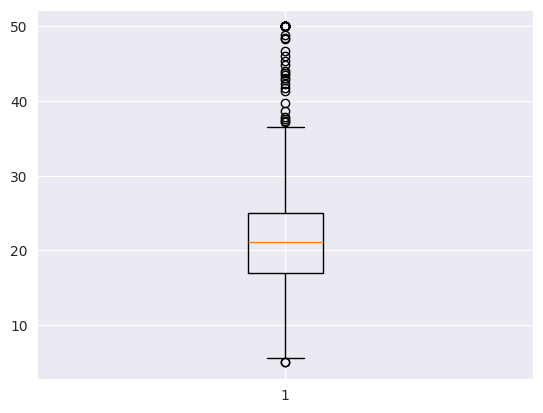

In [17]:
# boxplot - matplotlib
plt.boxplot(df['CMEDV'])
plt.show()


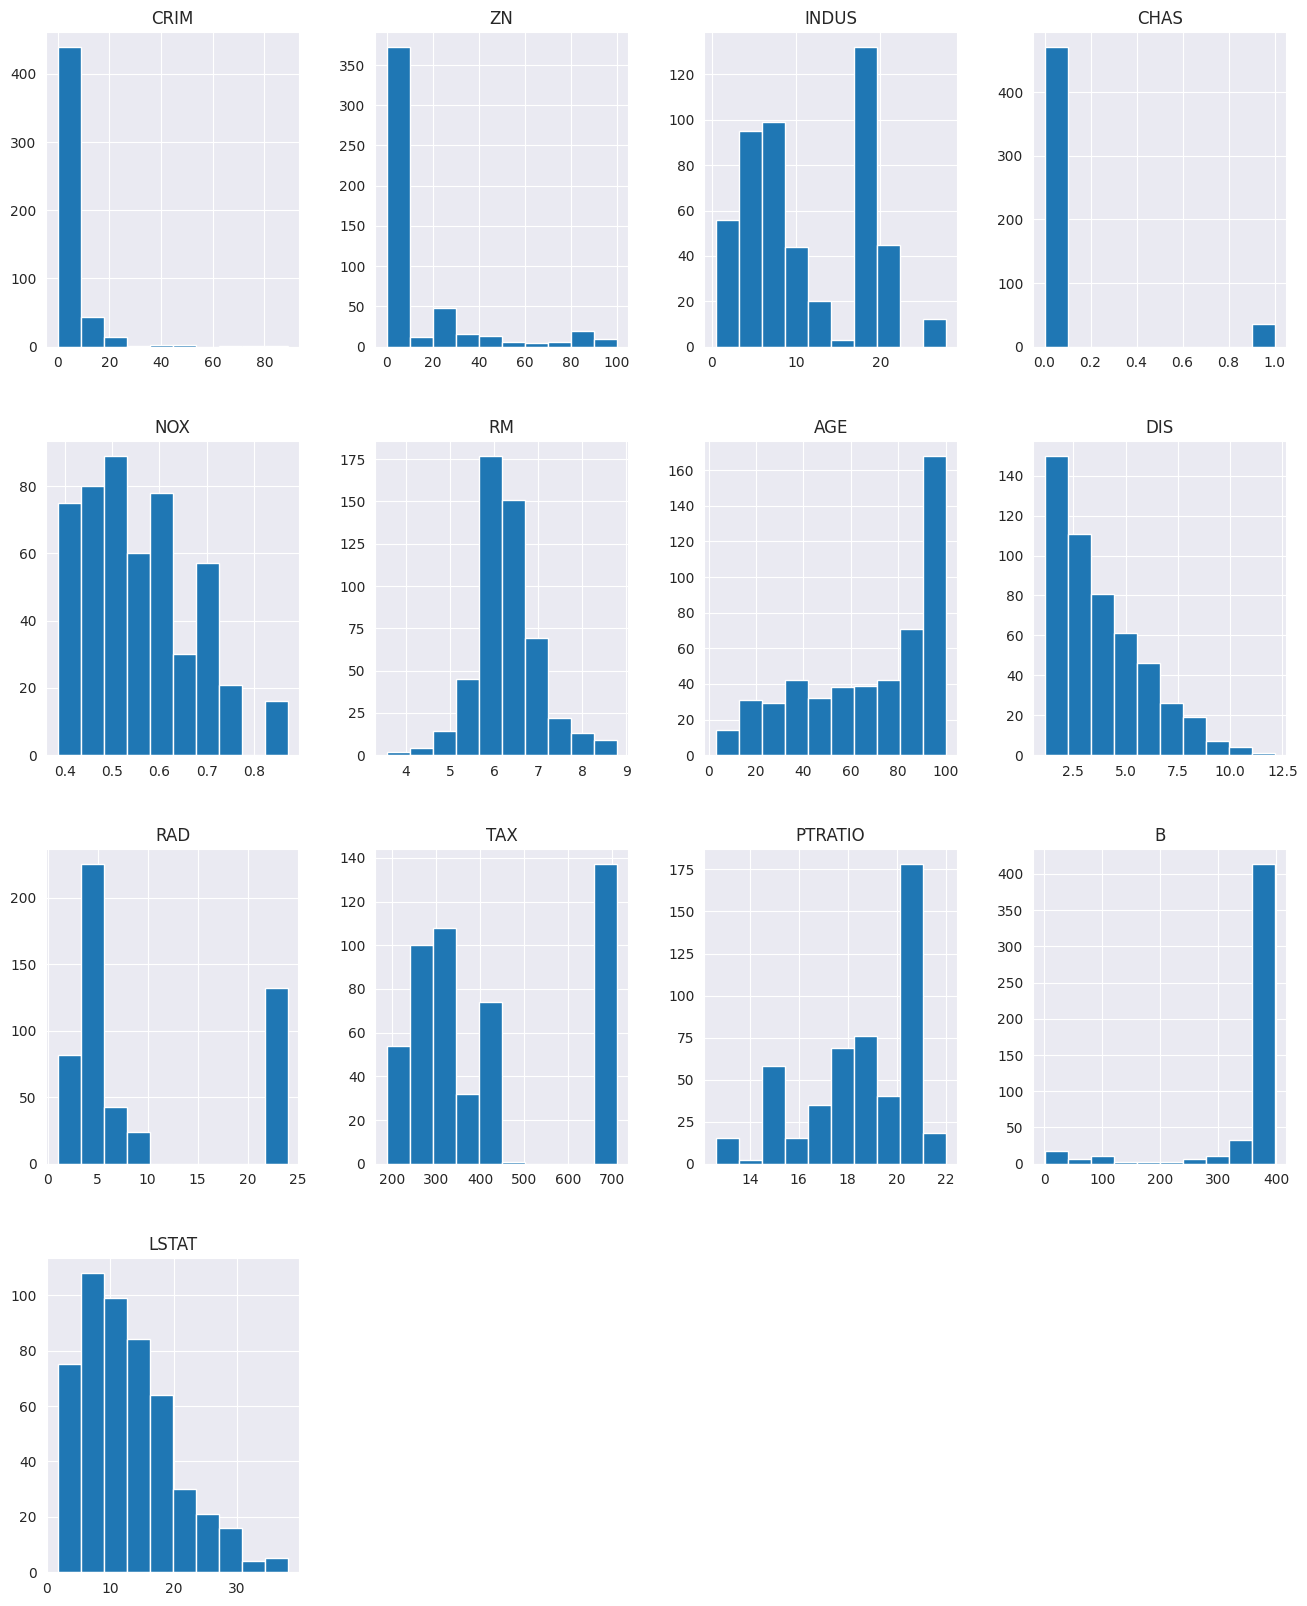

In [18]:
# numerical features (except "LON" & "LAT")
numerical_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

fig = plt.figure(figsize = (16, 20))
ax = fig.gca()  # Axes 생성

df[numerical_columns].hist(ax=ax)
plt.show()

In [20]:
# Person 상관계수
cols = ['CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

corr = df[cols].corr(method = 'pearson')
corr


,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CMEDV,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655,0.334861,-0.740836
CRIM,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.429300,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.377999,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249315,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.384766,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


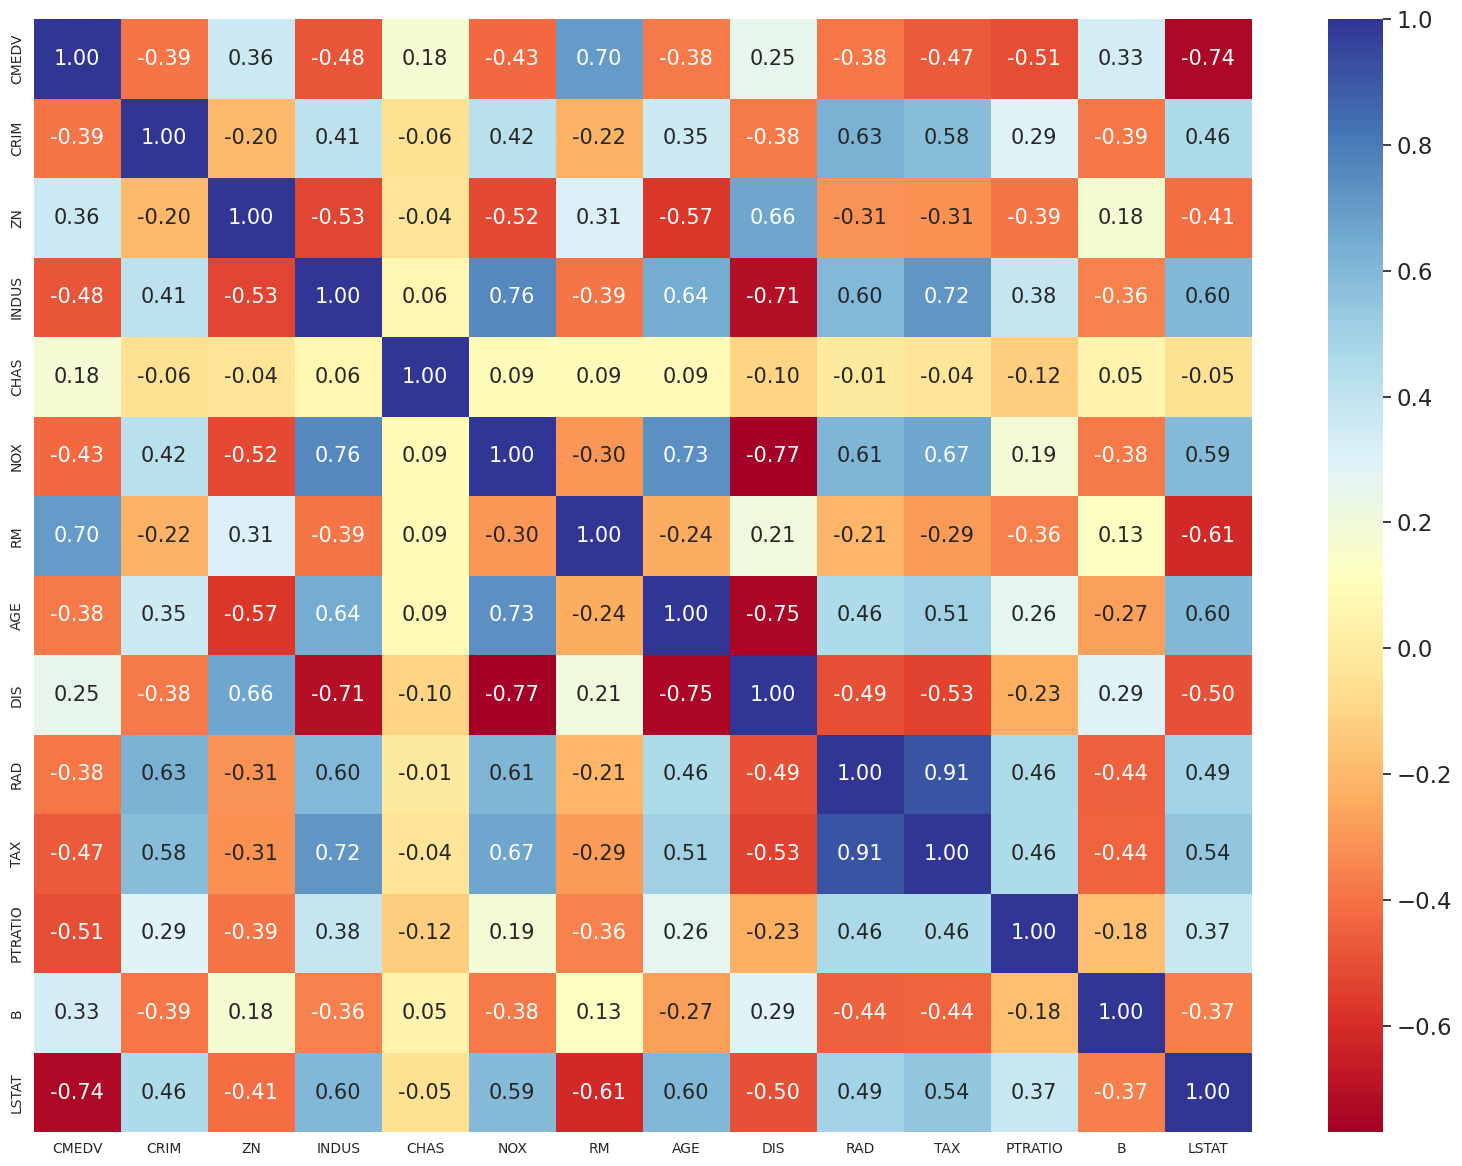

In [21]:
# heatmap (seaborn)
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "RdYlBu")
plt.tight_layout()
plt.show()

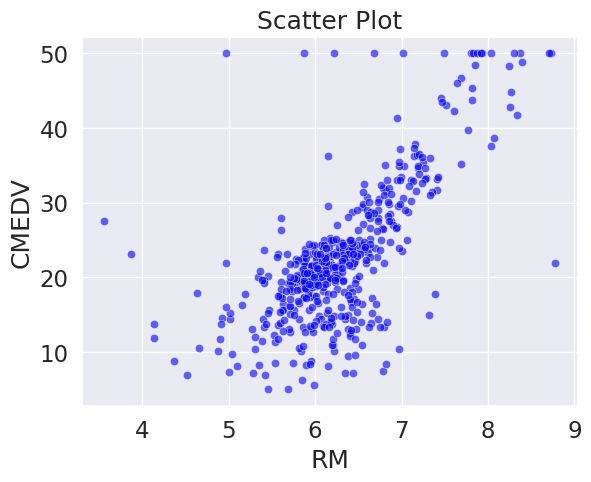

In [22]:
# scatter plot
sns.scatterplot(data=df, x='RM', y='CMEDV', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

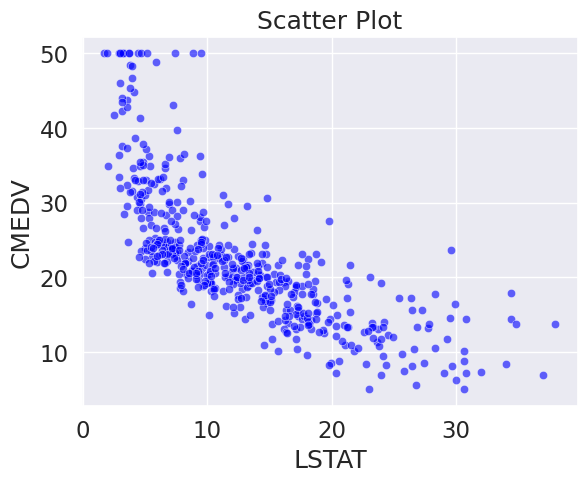

In [23]:
# scatter plot
sns.scatterplot(data=df, x='LSTAT', y='CMEDV', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

In [24]:
# 도시별 데이터 갯수
df['TOWN'].value_counts()

,count
TOWN,
Cambridge,30
Boston Savin Hill,23
Lynn,22
Boston Roxbury,19
Newton,18
...,...
Medfield,1
Dover,1
Lincoln,1


<Axes: >

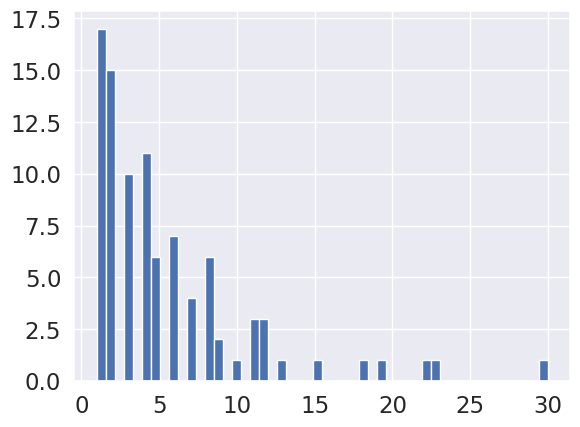

In [25]:
# 도시별 데이터 갯수 (bar plot)
df['TOWN'].value_counts().hist(bins=50)

<Axes: xlabel='CMEDV', ylabel='TOWN'>

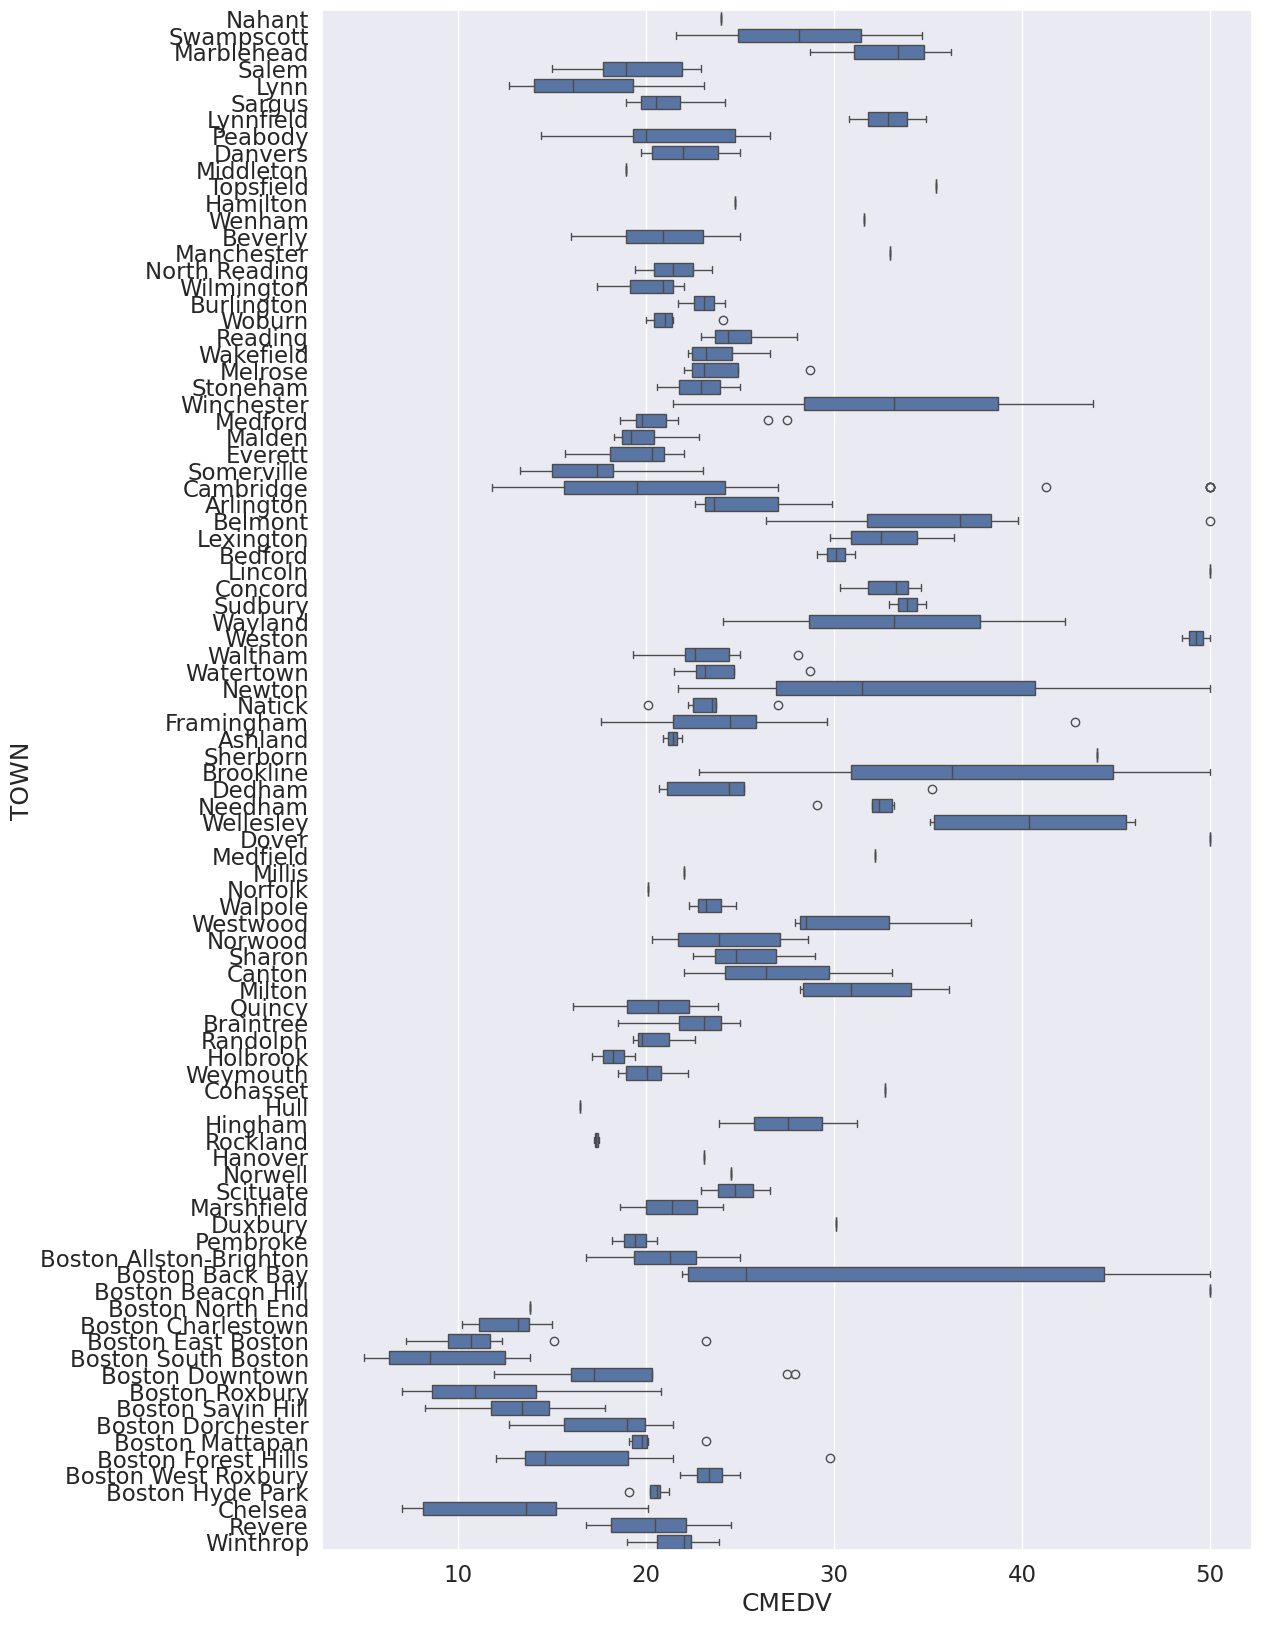

In [26]:
# 도시별 주택 가격 특징 (boxplot 이용)
fig = plt.figure(figsize = (12, 20))
sns.boxplot(x='CMEDV', y='TOWN', data=df)

<Axes: xlabel='CRIM', ylabel='TOWN'>

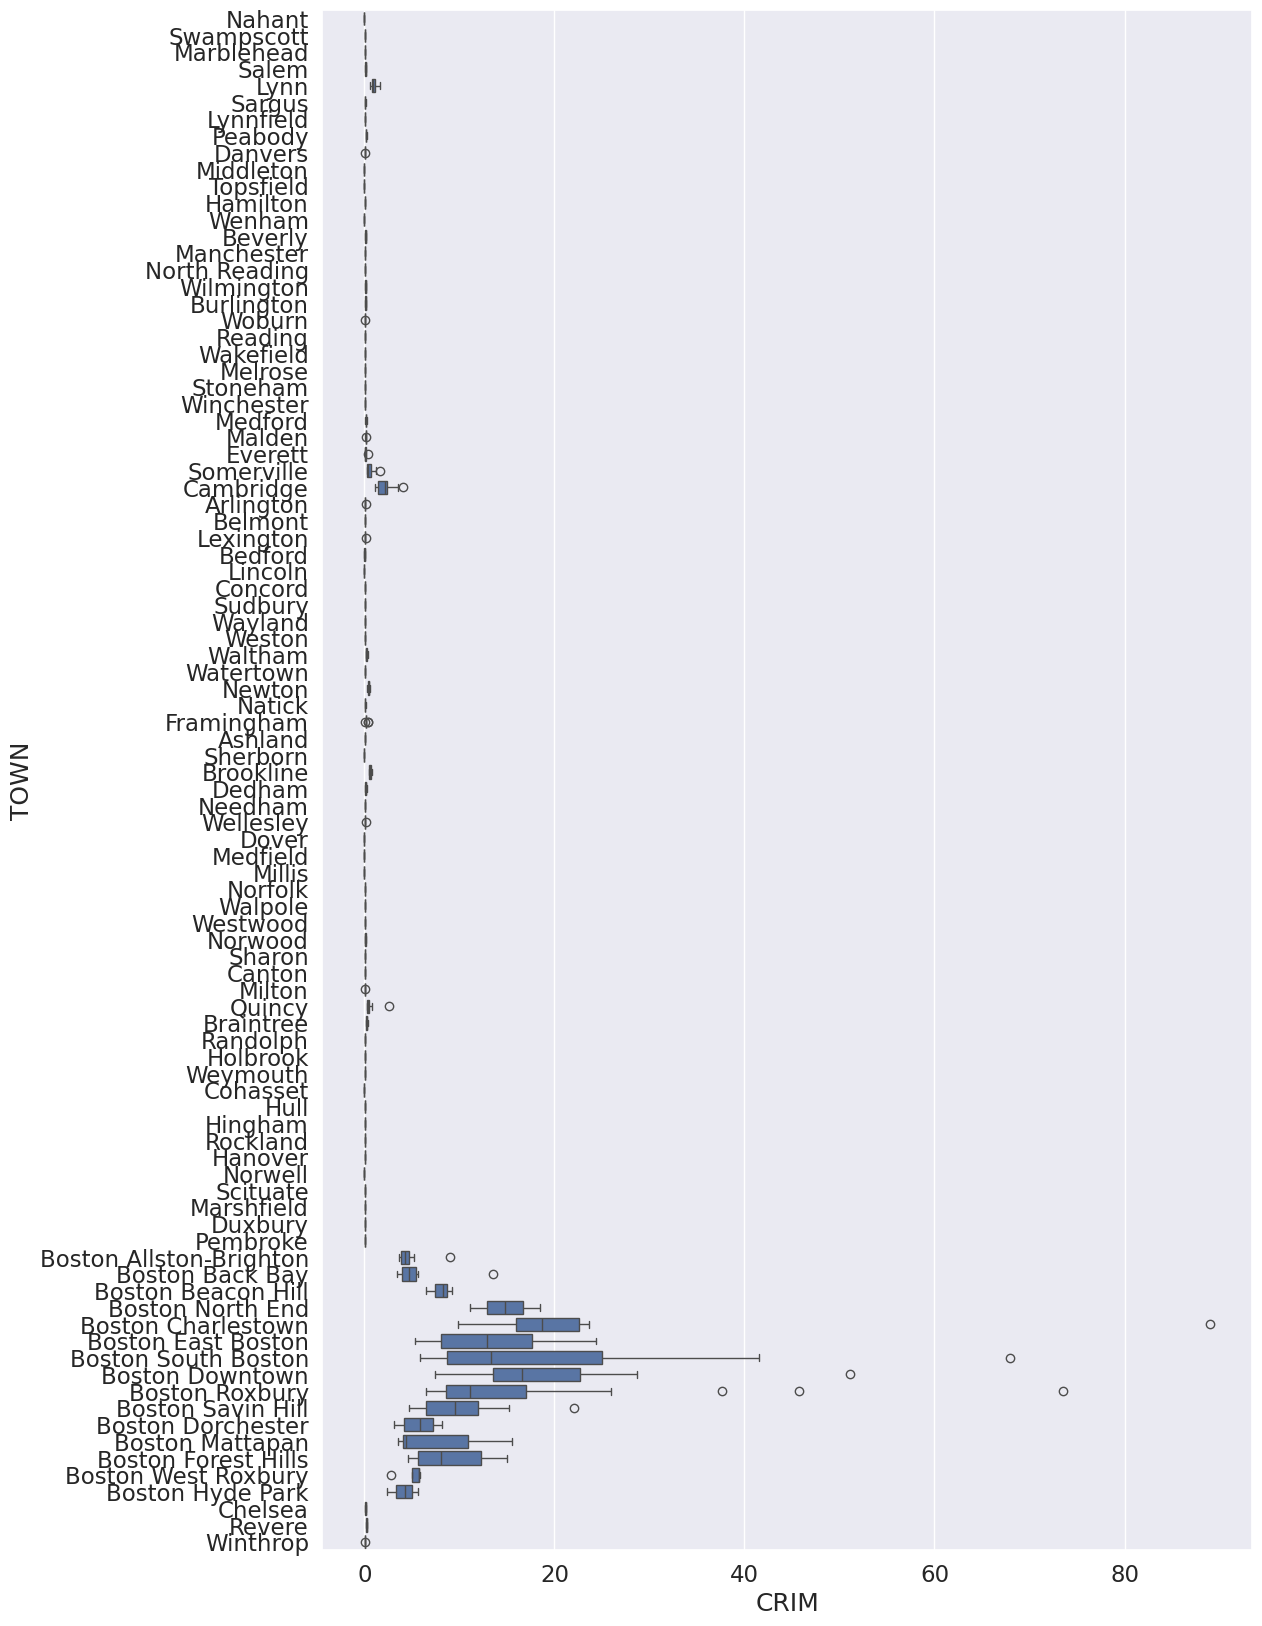

In [27]:
# 도시별 범죄율 특징
fig = plt.figure(figsize = (12, 20))
sns.boxplot(x='CRIM', y='TOWN', data=df)

In [28]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   CMEDV    506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


In [31]:

# feature standardization  (numerical_columns except dummy var.-"CHAS")
scaler = StandardScaler()  # 평균 0, 표준편차 1
scale_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df[scale_columns] = scaler.fit_transform(df[scale_columns])

In [32]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,Swampscott,-70.950,42.2875,21.6,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,Swampscott,-70.936,42.2830,34.7,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,Marblehead,-70.928,42.2930,33.4,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,Marblehead,-70.922,42.2980,36.2,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [33]:
# features for linear regression model
df[numerical_columns].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [34]:

# split dataset into training & test
X = df[numerical_columns]
y = df['CMEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [36]:
X_test.shape, y_test.shape

((102, 13), (102,))

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1)

,features,VIF Factor
0,CRIM,1.7
1,ZN,2.5
2,INDUS,3.8
3,CHAS,1.1
4,NOX,4.4
5,RM,1.9
6,AGE,3.2
7,DIS,4.2
8,RAD,8.1
9,TAX,9.8


In [38]:
from sklearn import linear_model

# fit regression model in training set
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# predict in test set
pred_test = lr.predict(X_test)

In [39]:
# print coef
print(lr.coef_)

[-0.9479409   1.39796831  0.14786968  2.13469673 -2.25995614  2.15879342
  0.12103297 -3.23121173  2.63662665 -1.95959865 -2.05639351  0.65670428
 -3.93702535]


In [40]:
# "feature - coefficients" DataFrame 만들기
coefs = pd.DataFrame(zip(df[numerical_columns].columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs

,feature,coefficients
0,CRIM,-0.947941
1,ZN,1.397968
2,INDUS,0.147870
3,CHAS,2.134697
4,NOX,-2.259956
5,RM,2.158793
6,AGE,0.121033
7,DIS,-3.231212
8,RAD,2.636627
9,TAX,-1.959599


In [41]:
# 크기 순서로 나열
coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
12,LSTAT,-3.937025
7,DIS,-3.231212
8,RAD,2.636627
4,NOX,-2.259956
5,RM,2.158793
3,CHAS,2.134697
10,PTRATIO,-2.056394
9,TAX,-1.959599
1,ZN,1.397968
0,CRIM,-0.947941


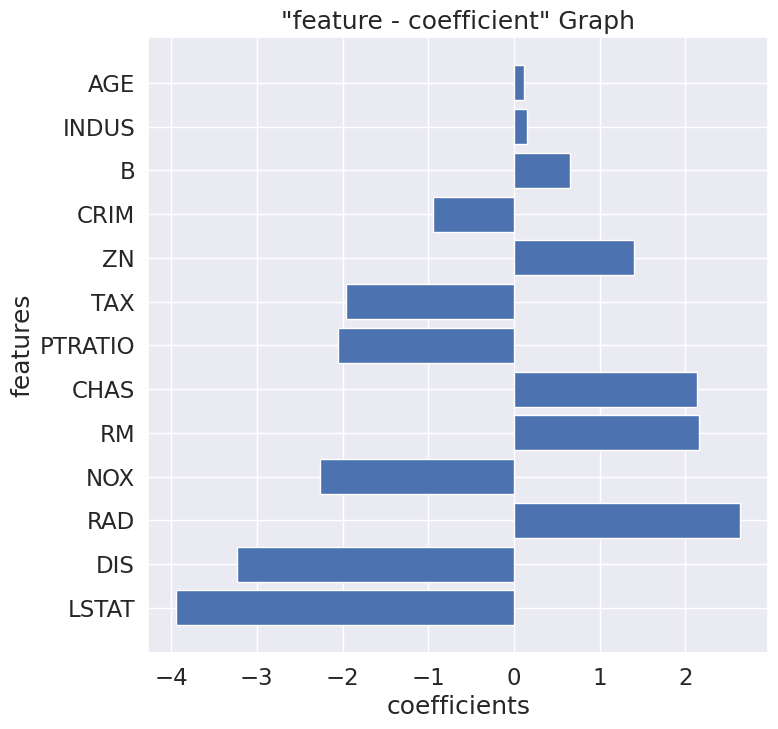

In [42]:
## coefficients 시각화

# figure size
plt.figure(figsize = (8, 8))

# bar plot
plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

In [44]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CMEDV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     82.86
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          1.72e-103
Time:                        05:08:52   Log-Likelihood:                -1191.9
No. Observations:                 404   AIC:                             2412.
Df Residuals:                     390   BIC:                             2468.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4313      0.245     91.399      0.000      21.949      22.914
CRIM          -0.9479      0.290     -3.263      0.001      -1.519      -0.377
ZN             1.3980      0.372      3.758      0.000       0.667       2.129
INDUS          0.1479      0.458      0.323      0.747      -0.753       1.049
CHAS           2.1347      0.899      2.375      0.018       0.367       3.902
NOX           -2.2600      0.490     -4.617      0.000      -3.222      -1.298
RM             2.1588      0.332      6.495      0.000       1.505       2.812
AGE            0.1210      0.415      0.292      0.771      -0.695       0.937
DIS           -3.2312      0.477     -6.774      0.000      -4.169      -2.293
RAD            2.6366      0.671      3.931      0.000       1.318       3.955
TAX           -1.9596      0.731     -2.679      0.008      -3.398      -0.522
PTRATIO       -2.0564      0.319     -6.446      0.000      -2.684      -1.429
B              0.6567      0.272      2.414      0.016       0.122       1.191
LSTAT         -3.9370      0.405     -9.723      0.000      -4.733      -3.141
==============================================================================
Omnibus:                      169.952   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              859.012
Skew:                           1.762   Prob(JB):                    2.94e-187
Kurtosis:                       9.213   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

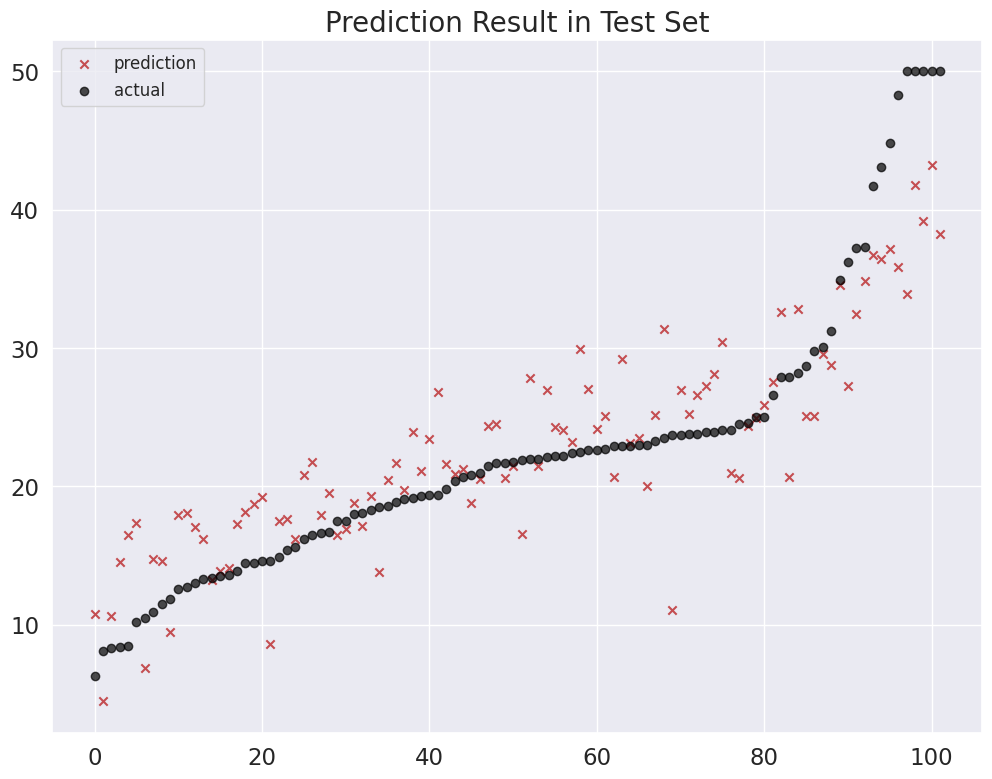

In [45]:
# 예측 결과 시각화 (test set)
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

In [46]:
# R square
print(model.score(X_train, y_train))  # training set
print(model.score(X_test, y_test))  # test set

0.7341832055169144
0.7639579157366418


In [47]:
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

# training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

# test set
print(sqrt(mean_squared_error(y_test, pred_test)))

4.624051760840334
4.829847098176561
